In [5]:
import networkx as nx
from src.utils.utils_networks import favor_centrality
import matplotlib.pyplot as plt
import os
from pathlib import Path
from itertools import count

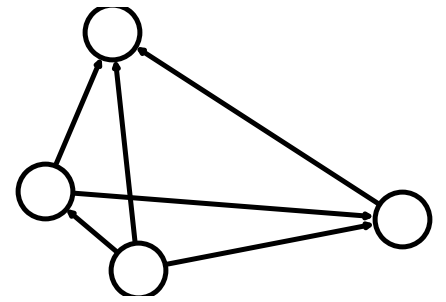

In [2]:
G = nx.DiGraph()
G.add_edges_from([('1', '2'), ('1', '3'), ('1','4'), ('2','3'), ('4','2'), ('4','3')])

h,a=nx.hits(G, max_iter=750)
f = favor_centrality(G)

h = {k:{'hubs':v} for k,v in h.items()}
a = {k:{'authorities':v} for k,v in a.items()}
f = {k:{'favor':v} for k,v in f.items()}

nx.set_node_attributes(G, h)
nx.set_node_attributes(G, a)
nx.set_node_attributes(G, f)

# Simple plot
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

nx.draw(G, **options)

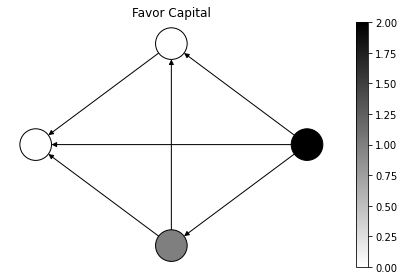

In [6]:
def plot_graph_by_node_property(p):
    # get unique groups
    node_values = nx.get_node_attributes(G,p)
    groups = set(node_values.values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[node_values[n]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.circular_layout(G)
    size = 1000
    ec = nx.draw_networkx_edges(G, pos, alpha=1, node_size=size, arrowstyle='-|>')
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, 
                                with_labels=False, node_size=size, cmap=plt.cm.binary, edgecolors='k')

    plt.colorbar(nc)
    plt.axis('off')

plot_graph_by_node_property(p='favor')
plt.title('Favor Capital')
plt.tight_layout()
save_to = os.path.join(Path(os.getcwd()).parent.resolve(), 'reports', 'figures', f'toy_mode_favor_capital.png')
plt.savefig(save_to)    
plt.show()

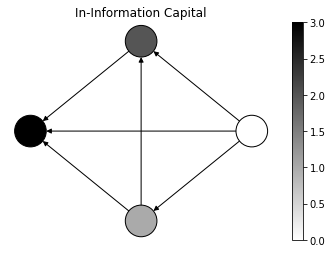

In [7]:
plot_graph_by_node_property(p='authorities')
plt.title('In-Information Capital')
save_to = os.path.join(Path(os.getcwd()).parent.resolve(), 'reports', 'figures', f'toy_mode_in_info_capital.png')
plt.savefig(save_to)    
plt.show()

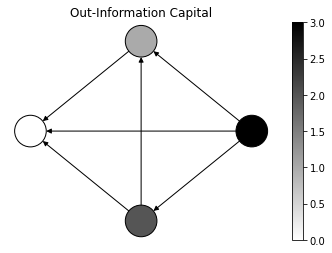

In [8]:
plot_graph_by_node_property(p='hubs')
plt.title('Out-Information Capital')
save_to = os.path.join(Path(os.getcwd()).parent.resolve(), 'reports', 'figures', f'toy_mode_out_info_capital.png')
plt.savefig(save_to)    
plt.show()